In [47]:
# Developed By: Hua Kang and Henry Burton
#
# Objective: From Rupture to Recovery: Integrating Probabilistic Building Performance Assessment, 
# Household Decision Making and Socioeconomic Vulnerability to Model Post-Earthquake Housing Recovery
#
# Date: June 06, 2018

import csv
import time
import random
from scipy.stats import norm
from scipy.stats import lognorm
import math

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

DAYS_BEFORE_EVENT = 200
numOfDS = 5
start = time.clock()

In [48]:
def read_config_file(filename, cast_func=None):
    with open(filename, 'r') as f:
        lines = [line.strip() for line in f.readlines()]
        if cast_func:
            lines = [cast_func(line) for line in lines]
        return lines
    
### Load time parameters
with open('utility.csv', 'r') as f:
    reader = csv.reader(f)
    utility = list(reader)

utilityIM = [0 for x in range(len(utility) - 1)]
roadwaysIM = [0 for x in range(len(utility) - 1)]
for i in range(len(utility) - 1):
    utilityIM[i] = float(utility[i+1][1])
    roadwaysIM[i] = float(utility[i+1][2])

In [49]:
### Utility Damage

def computeUtilityDamage(fragilityCode):
    # Compute CDF for the four building damage state

    utilityDistribution = [[0 for x in range(len(utilityIM))] for y in range(numOfDS)]

    for num in range(len(utilityIM)):
        currentSD = utilityIM[num]
        CDF = [0 for x in range(numOfDS-1)]
        currentDamageStateProbabilities = [0 for x in range(numOfDS)]
        currentRecoveryTimes = [0 for x in range(numOfDS)]
        for j in range(numOfDS-1):
            CDF[numOfDS-j-2] = norm.cdf(math.log(float(currentSD)), loc=math.log(float(fragilityCode[j*2])), scale = float(fragilityCode[j*2+1]))

        # Compute probability in each damage state
        for i in range(numOfDS-1):
            if i == 0:
                currentDamageStateProbabilities[numOfDS-1-i] = CDF[i]
            else:
                currentDamageStateProbabilities[numOfDS-1-i] = CDF[i] - CDF[i-1]    
        currentDamageStateProbabilities[0] = 1 - CDF[numOfDS-2]
        utilityDistribution[num] = currentDamageStateProbabilities
        
    return utilityDistribution;

def computeRoadwaysDamage(fragilityCode):
    # Compute CDF for the four building damage state

    roadwaysDistribution = [[0 for x in range(len(utilityIM))] for y in range(numOfDS)]

    for num in range(len(utilityIM)):
        currentSD = roadwaysIM[num]
        CDF = [0 for x in range(numOfDS-1)]
        currentDamageStateProbabilities = [0 for x in range(numOfDS)]
        currentRecoveryTimes = [0 for x in range(numOfDS)]
        for j in range(numOfDS-1):
            CDF[numOfDS-j-2] = norm.cdf(math.log(float(currentSD)), loc=math.log(float(fragilityCode[j*2])), scale = float(fragilityCode[j*2+1]))

        # Compute probability in each damage state
        for i in range(numOfDS-1):
            if i == 0:
                currentDamageStateProbabilities[numOfDS-1-i] = CDF[i]
            else:
                currentDamageStateProbabilities[numOfDS-1-i] = CDF[i] - CDF[i-1]    
        currentDamageStateProbabilities[0] = 1 - CDF[numOfDS-2]
        roadwaysDistribution[num] = currentDamageStateProbabilities
        
    return roadwaysDistribution;

def plotUtilityDamage(utilityDistribution):

    plt.subplot(231)
    objects = ('No Damage', 'Slight', 'Moderate', 'Extensive', 'Complete')
    y_pos = np.arange(len(objects))
    performance = utilityDistribution[0]

    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.xlabel('Damage State')
    plt.ylabel('Probability of Exceedance')
    plt.axis([-1, 5, 0, 1])
    plt.title('Koreatown')

    plt.subplot(232)
    objects = ('No Damage', 'Slight', 'Moderate', 'Extensive', 'Complete')
    y_pos = np.arange(len(objects))
    performance = utilityDistribution[1]

    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.xlabel('Damage State')
    plt.ylabel('Probability of Exceedance')
    plt.axis([-1, 5, 0, 1])
    plt.title('East Hollywood')

    plt.subplot(233)
    objects = ('No Damage', 'Slight', 'Moderate', 'Extensive', 'Complete')
    y_pos = np.arange(len(objects))
    performance = utilityDistribution[2]

    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.xlabel('Damage State')
    plt.ylabel('Probability of Exceedance')
    plt.axis([-1, 5, 0, 1])
    plt.title('Pico Union')

    plt.subplot(234)
    objects = ('No Damage', 'Slight', 'Moderate', 'Extensive', 'Complete')
    y_pos = np.arange(len(objects))
    performance = utilityDistribution[3]

    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.xlabel('Damage State')
    plt.ylabel('Probability of Exceedance')
    plt.axis([-1, 5, 0, 1])
    plt.title('Westlake')

    plt.subplot(235)
    objects = ('No Damage', 'Slight', 'Moderate', 'Extensive', 'Complete')
    y_pos = np.arange(len(objects))
    performance = utilityDistribution[4]

    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.xlabel('Damage State')
    plt.ylabel('Probability of Exceedance')
    plt.axis([-1, 5, 0, 1])
    plt.title('Lomita')

    plt.show()
    return;

def plotUtilityDamage2(utilityDistribution):

    # create a plot
    n_groups = numOfDS
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.15
    opacity = 0.8

    rects1 = plt.bar(index, utilityDistribution[0], bar_width, alpha = opacity, color = 'm', label = 'Koreatown')
    rects2 = plt.bar(index + bar_width, utilityDistribution[1], bar_width, alpha = opacity, color = 'g', label = 'East Hollywood')
    rects3 = plt.bar(index + 2*bar_width, utilityDistribution[2], bar_width, alpha = opacity, color = 'r', label = 'Pico Union')
    rects4 = plt.bar(index + 3*bar_width, utilityDistribution[3], bar_width, alpha = opacity, color = 'c', label = 'Westlake')
    rects5 = plt.bar(index + 4*bar_width, utilityDistribution[4], bar_width, alpha = opacity, color = 'y', label = 'Lomita')

    objects = ('No Damage', 'Slight', 'Moderate', 'Extensive', 'Complete')

    #plt.xticks(objects)
    plt.xlabel('Damage State')
    plt.ylabel('Probability of Exceedance')
    plt.xticks(index + bar_width + 0.05, objects)
    plt.legend()

    plt.show()
    return;

In [50]:
### Water Damage Distribution (SA)

waterFragility = [0.25, 0.50, 0.38, 0.50, 0.53, 0.60, 0.83, 0.60]    # HAZUS Page 392
waterRecoveryTime = [0.9, 0.3, 1.9, 1.2, 32.0, 31.0, 95.0, 65.0]     # HAZUS Page 388

waterDistribution = computeUtilityDamage(waterFragility);
#plotUtilityDamage(waterDistribution)
#plotUtilityDamage2(waterDistribution)

In [51]:
### Sewerage Damage Distribution (SA)

sewerageFragility = [0.23, 0.40, 0.35, 0.40, 0.48, 0.50, 0.80, 0.55]    # HAZUS Page 417
sewerageRecoveryTime = [1.3, 0.7, 3.0, 1.5, 21.0, 12.0, 65.0, 25.0]     # HAZUS Page 416
sewerageDistribution = computeUtilityDamage(sewerageFragility);
#plotUtilityDamage(sewerageDistribution)

In [52]:
### Electric Damage Distribution (SA)

electricFragility = [0.15, 0.70, 0.29, 0.55, 0.45, 0.45, 0.90, 0.45]    # HAZUS Page 448
electricRecoveryTime = [1.0, 0.5, 3.0, 1.5, 7.0, 3.5, 30.0, 15.0]     # HAZUS Page 446
electricDistribution = computeUtilityDamage(electricFragility);
#plotUtilityDamage(electricDistribution)

In [53]:
### Roadways Damage Distribution (SD)

roadwaysFragility = [12, 0.7, 24, 0.7, 60, 0.7, 60, 0.7]    # HAZUS Page 296
roadwaysRecoveryTime = [0.9, 0.05, 2.2, 1.8, 21, 16, 21, 16]     # HAZUS Page 295
roadwaysDistribution = computeRoadwaysDamage(roadwaysFragility);
#plotUtilityDamage(roadwaysDistribution)

In [54]:
# Compute maximum utility loss time
def computeUtilityDamageState(randomNumber, utilityFragility):
    ds = 0;
    sumOfProb = 0;
    for i in range(numOfDS):
        sumOfProb += utilityFragility[i]
        if (randomNumber <= sumOfProb):
            ds = i;
            break;
    return ds;

def computeUtilityRestoreTime(utilityDS, utilityRecoveryTime):
    if utilityDS == 0:
        return 0;
    mean = utilityRecoveryTime[(utilityDS - 1) * 2];
    dispersion = utilityRecoveryTime[(utilityDS - 1) * 2 + 1];
    time = math.log(1 - random.random()) * (-mean);
    return time;

def computeUtilityLossTime(neighborhoodNumber, randomNumber1, randomNumber2, randomNumber3):
    waterDS = computeUtilityDamageState(randomNumber1, waterDistribution[neighborhoodNumber]);
    waterTime = computeUtilityRestoreTime(waterDS, waterRecoveryTime);
    
    sewerageDS = computeUtilityDamageState(randomNumber2, sewerageDistribution[neighborhoodNumber]);
    sewerageTime = computeUtilityRestoreTime(sewerageDS, sewerageRecoveryTime);
    
    electricDS = computeUtilityDamageState(randomNumber3, electricDistribution[neighborhoodNumber]);
    electricTime = computeUtilityRestoreTime(electricDS, electricRecoveryTime);
    
    return max(max(waterTime, sewerageTime), electricTime);


In [55]:
# Compute building access
def computeBuildingAccessTime(neighborhoodNumber):
    randomNumber = random.random();
    roadwaysDS = computeUtilityDamageState(randomNumber, roadwaysDistribution[neighborhoodNumber]);
    roadwaysTime = computeUtilityRestoreTime(roadwaysDS, roadwaysRecoveryTime);
    return roadwaysTime;


In [56]:
# Compute Selling Time

meanLomita = 2.7611;
sigmaLomita = 1.1113;

meanOtherFour = 3.2329;
sigmaOtherFour = 1.1442;

def computeSellTime(neighborhoodNumber):
    if neighborhoodNumber == 4:
        time = lognorm(meanLomita, scale = np.exp(sigmaLomita)).ppf(random.random());
    else:
        time = lognorm(meanOtherFour, scale = np.exp(sigmaOtherFour)).ppf(random.random());
    return time;

In [57]:
# Compute Building Damage State (use PS)

def computeDamageState(buildingType, numOfStory, softStory, SA):
    ### Simulate Building Limit State Probabilities
    randNum = random.random()
    Code = [0 for x in range((numOfDS-1)*2)]
    if buildingType == 0: # Single family
        Code = fragility[22][1:][::2]
    elif buildingType == 1 and numOfStory == 1: # multi-family and 1 story
        if randNum < 0.17:
            Code = fragility[18][1:][::2]
        elif randNum < 0.19:
            Code = fragility[19][1:][::2]
        elif randNum < 0.8:
            Code = fragility[20][1:][::2]
        else:
            Code = fragility[21][1:][::2]
    elif softStory == 0:  # multi-family NON-SWOF
        if numOfStory == 2:
            if randNum < 0.17:
                Code = fragility[10][1:][::2]
            elif randNum < 0.19:
                Code = fragility[11][1:][::2]
            elif randNum < 0.8:
                Code = fragility[12][1:][::2]
            else:
                Code = fragility[13][1:][::2]
        else:
            if randNum < 0.17:
                Code = fragility[14][1:][::2]
            elif randNum < 0.19:
                Code = fragility[15][1:][::2]
            elif randNum < 0.8:
                Code = fragility[16][1:][::2]
            else:
                Code = fragility[17][1:][::2]
    else:
        if numOfStory == 2:
            if randNum < 0.17:
                Code = fragility[2][1:][::2]
            elif randNum < 0.19:
                Code = fragility[3][1:][::2]
            elif randNum < 0.8:
                Code = fragility[4][1:][::2]
            else:
                Code = fragility[5][1:][::2]
        else:
            if randNum < 0.17:
                Code = fragility[6][1:][::2]
            elif randNum < 0.19:
                Code = fragility[7][1:][::2]
            elif randNum < 0.8:
                Code = fragility[8][1:][::2]
            else:
                Code = fragility[9][1:][::2]       
   
    # Compute CDF for the four building damage state
    CDF = [0 for x in range(numOfDS)]
    currentDamageStateProbabilities = [0 for x in range(numOfDS+1)]
    for j in range(numOfDS):
        CDF[numOfDS-j-1] = norm.cdf(math.log(float(SA)), loc=math.log(float(Code[j])), scale = 0.6)



    # Compute probability in each damage state
    for i in range(numOfDS):
        if i == 0:
            currentDamageStateProbabilities[numOfDS-i] = CDF[i]
        else:
            currentDamageStateProbabilities[numOfDS-i] = CDF[i] - CDF[i-1]    
    currentDamageStateProbabilities[0] = 1 - CDF[numOfDS-1]

    # Simulate the damage state
    DS = -1
    randNum = random.random()
    sumOfDSProb = 0.0
    for i in range(numOfDS+1):
        sumOfDSProb += float(currentDamageStateProbabilities[i])
        if DS == -1 and randNum < sumOfDSProb:
            DS = i
    return DS;           


In [58]:
### Compute decision-making

insuranceAll = 0.17;
incomeAll = [30558, 29927, 26424, 26757, 59059];

betaO20 = -0.9087379;
betaO2SEN = 0.02817450;
betaO2YR = -0.04925957;
betaO2NE = 1.174928;
betaO2DM = 0.124578;
betaO2UL = 0.3830488;
betaO2AC = 0.3291985;
betaO2I = -0.4427242;
betaO2INS = 0.6336464;

betaO30 = -0.1446963;
betaO3SEN = 0.01958194;
betaO3YR = -0.06038452;
betaO3NE = 1.174621;
betaO3DM = 0.195154;
betaO3UL = 0.4712219;
betaO3AC = 0.4264579;
betaO3I = -0.5431955;
betaO3INS = -1.1543349;

betaR20 = 1.631933;
betaR2SEN = -0.007706649;
betaR2YR = 0.02061422;
betaR2NE = -0.74127052;
betaR2DM = 0.6932989;
betaR2UL = 1.200594;
betaR2AC = 0.3681095;
betaR2I = -0.41440130;

betaR30 = -1.295588;
betaR3SEN = -0.060506780;
betaR3YR = -0.04307751;
betaR3NE = 0.00217765;
betaR3DM = 0.8846331;
betaR3UL = 1.233216;
betaR3AC = 0.6668411;
betaR3I = -0.05799136;

def computeDecisionMaking(neighborhoodNumber, buildingDS, utilityTime, accessTime, R):
    if random.random() > insuranceAll:
        insurance = 0;
    else:
        insurance = 1;

    neighborhoodSense = random.randint(0,9);
    yearsLiving = random.randint(0,30);
    neighborVacancy = random.randint(0,100)/100;
    income = math.log(incomeAll[neighborhoodNumber]/1000);
    dsTime = 0;
    if buildingDS == 0:
        dsTime = 0;
    elif buildingDS == 1:
        dsTime = 5/30;
    elif buildingDS == 2:
        dsTime = 120/30;
    elif buildingDS == 3:
        dsTime = 360/30;
    else:
        dsTime = 720/30;
    
    utilityTime = 0;
    accessTime = 0;
    
    if R == 1:
    
        partI = math.exp(betaR20 + betaR2SEN * neighborhoodSense + betaR2YR * yearsLiving + \
                         betaR2NE * neighborVacancy + betaR2DM * dsTime + \
                        betaR2UL * utilityTime + betaR2AC * accessTime + betaR2I * income);
        partII = math.exp(betaR30 + betaR3SEN * neighborhoodSense + betaR3YR * yearsLiving + \
                         betaR3NE * neighborVacancy + betaR3DM * dsTime + \
                        betaR3UL * utilityTime + betaR3AC * accessTime + betaR3I * income);
    else:
        partI = math.exp(betaO20 + betaO2SEN * neighborhoodSense + betaO2YR * yearsLiving + \
                         betaO2NE * neighborVacancy + betaO2DM * dsTime + \
                        betaO2UL * utilityTime + betaO2AC * accessTime + betaO2I * income+ \
                        betaO2INS * insurance);
        partII = math.exp(betaO30 + betaO3SEN * neighborhoodSense + betaO3YR * yearsLiving + \
                         betaO3NE * neighborVacancy + betaO3DM * dsTime + \
                        betaO3UL * utilityTime + betaO3AC * accessTime + betaO3I * income + \
                        betaO3INS * insurance);
    
    
    prob = [0 for x in range(3)];
    prob[0] = 1/(1 + partI + partII);
    prob[1] = partI / (1 + partI + partII);
    prob[2] = partII / (1 + partI + partII);

    choice = -1;
    if prob[0] >= prob[1] and prob[0] >= prob[2]:
        choice = 0;
    elif prob[1] > prob[2]:
        choice = 1;
    else:
        choice = 2;
    return choice;


In [59]:

print(betaR2SEN * 5);
print(betaR2NE * 0.5);
print(betaR2DM * 5/30);
print(betaR2I * math.log(33));
print("*********")
print(betaR3SEN * 5);
print(betaR3NE * 0.5);
print(betaR3DM * 0/30);
print(betaR3I * math.log(33));

print("--------")
partI = math.exp(betaR20 + betaR2SEN * 0 + betaR2YR * 0 + \
                         betaR2NE * 1 + betaR2I * math.log(30));
partII = math.exp(betaR30 + betaR3SEN * 0 + betaR3YR * 0 + \
                         betaR3NE * 1 + betaR3I * math.log(30));
prob = [0 for x in range(3)];
prob[0] = 1/(1 + partI + partII);
prob[1] = partI / (1 + partI + partII);
prob[2] = partII / (1 + partI + partII);

print(partI)
print(partII)
print(prob)

-0.038533245
-0.37063526
0.11554981666666668
-1.4489572789315392
*********
-0.3025339
0.001088825
0.0
-0.20276722873972478
--------
0.5952355100638128
0.22522611816688404
[0.5493112211169747, 0.3269695448853383, 0.12371923399768711]


In [60]:
def plotDecisionMaking(count):
    plt.subplot(231)
    objects = ('Choice 1', 'Choice 2', 'Choice 3')
    y_pos = np.arange(len(objects))
    performance = [count[0][0], count[1][0], count[2][0]]

    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.xticks(y_pos, objects)
    #plt.axis([-1, 3])
    plt.title('Koreatown')

    plt.subplot(232)
    objects = ('Choice 1', 'Choice 2', 'Choice 3')
    y_pos = np.arange(len(objects))
    performance = [count[0][1], count[1][1], count[2][1]]

    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Probability of each choice')
    #plt.axis([-1, 3])
    plt.title('East Hollywood')

    plt.subplot(233)
    objects = ('Choice 1', 'Choice 2', 'Choice 3')
    y_pos = np.arange(len(objects))
    performance = [count[0][2], count[1][2], count[2][2]]

    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Probability of each choice')
    #plt.axis([-1, 3])
    plt.title('Pico Union')

    plt.subplot(234)
    objects = ('Choice 1', 'Choice 2', 'Choice 3')
    y_pos = np.arange(len(objects))
    performance = [count[0][3], count[1][3], count[2][3]]

    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Probability of each choice')
    #plt.axis([-1, 3])
    plt.title('Westlake')

    plt.subplot(235)
    objects = ('Choice 1', 'Choice 2', 'Choice 3')
    y_pos = np.arange(len(objects))
    performance = [count[0][4], count[1][4], count[2][4]]

    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Probability of each choice')
    #plt.axis([-1, 3])
    plt.title('Lomita')

    plt.subplot(236)
    objects = ('Choice 1', 'Choice 2', 'Choice 3')
    y_pos = np.arange(len(objects))
    performance = [count[0][5], count[1][5], count[2][5]]

    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Probability of each choice')
    #plt.axis([-1, 3])
    plt.title('Total')

    plt.show()
    return;

In [61]:
def plotDS(count):
    plt.subplot(231)
    objects = ('No Damage', 'Slight', 'Moderate', 'Extensive', 'Complete')
    y_pos = np.arange(len(objects))
    performance = [count[0][0], count[1][0], count[2][0], count[3][0], count[4][0]]

    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.xticks(y_pos, objects)
    #plt.axis([-1, 3])
    plt.title('Koreatown')

    plt.subplot(232)
    objects = ('No Damage', 'Slight', 'Moderate', 'Extensive', 'Complete')
    y_pos = np.arange(len(objects))
    performance = [count[0][1], count[1][1], count[2][1], count[3][1], count[4][1]]

    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Probability of each choice')
    #plt.axis([-1, 3])
    plt.title('East Hollywood')

    plt.subplot(233)
    objects = ('No Damage', 'Slight', 'Moderate', 'Extensive', 'Complete')
    y_pos = np.arange(len(objects))
    performance = [count[0][2], count[1][2], count[2][2], count[3][2], count[4][2]]

    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Probability of each choice')
    #plt.axis([-1, 3])
    plt.title('Pico Union')

    plt.subplot(234)
    objects = ('No Damage', 'Slight', 'Moderate', 'Extensive', 'Complete')
    y_pos = np.arange(len(objects))
    performance = [count[0][3], count[1][3], count[2][3], count[3][3], count[4][3]]
    
    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Probability of each choice')
    #plt.axis([-1, 3])
    plt.title('Westlake')

    plt.subplot(235)
    objects = ('No Damage', 'Slight', 'Moderate', 'Extensive', 'Complete')
    y_pos = np.arange(len(objects))
    performance = [count[0][4], count[1][4], count[2][4], count[3][4], count[4][4]]

    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Probability of each choice')
    #plt.axis([-1, 3])
    plt.title('Lomita')

    plt.subplot(236)
    objects = ('No Damage', 'Slight', 'Moderate', 'Extensive', 'Complete')
    y_pos = np.arange(len(objects))
    performance = [count[0][5], count[1][5], count[2][5], count[3][5], count[4][5]]

    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Probability of each choice')
    #plt.axis([-1, 3])
    plt.title('Total')

    plt.show()
    return;

In [62]:
### Load recovery time related files
 
# read configuration files
leadTimeDispersion = read_config_file('LeadTimeDispersion.txt', float)

### Load time parameters
with open('timeParameters.csv', 'r') as f:
    reader = csv.reader(f)
    timeParameters = list(reader)

inspectionTimesSingle = [0 for x in range(numOfDS * 2)]
financeTimesSingle = [0 for x in range(numOfDS * 2)]
permitTimesSingle = [0 for x in range(numOfDS * 2)]
repairTimesSingle = [0 for x in range(numOfDS * 2)]

inspectionTimesMulti = [0 for x in range(numOfDS * 2)]
financeTimesMulti = [0 for x in range(numOfDS * 2)]
permitTimesMulti = [0 for x in range(numOfDS * 2)]
repairTimesMulti = [0 for x in range(numOfDS * 2)]

for i in range(numOfDS*2):
    inspectionTimesSingle[i] = float(timeParameters[1][i+1])
    financeTimesSingle[i] = float(timeParameters[2][i+1])
    permitTimesSingle[i] = float(timeParameters[3][i+1])
    repairTimesSingle[i] = float(timeParameters[4][i+1])
    inspectionTimesMulti[i] = float(timeParameters[5][i+1])
    financeTimesMulti[i] = float(timeParameters[6][i+1])
    permitTimesMulti[i] = float(timeParameters[7][i+1])
    repairTimesMulti[i] = float(timeParameters[8][i+1])

In [63]:
# Simulate lead time 

def simulatedTimeParameters(inspectionTimes, financeTimes, permitTimes, repairTimes):
    randomNumber = random.random()

    # Simulate lead times
    simulateInspectionTimes = []
    simulateFinanceTimes = []
    simulatePermitTimes = []
    simulateRepairTimes = []

    for i in range(numOfDS):
        simulateInspectionTimes.append("")
        simulateFinanceTimes.append("")
        simulatePermitTimes.append("")
        simulateRepairTimes.append("")

    # Calculate simulated inspection time/assessment time/mobilization
    # time based on lead time dispersion
    for i in range(numOfDS):
        if float(inspectionTimes[i*2]) > 0:
            simulateInspectionTimes[i] = math.log(1 - random.random()) * (-float(inspectionTimes[i*2]))
#                 math.exp(
#                     norm.ppf(randomNumber,
#                              loc=math.log(float(inspectionTimesAll[i*2])),
#                              scale=inspectionTimesAll[i*2+1]))
        else:
            simulateInspectionTimes[i] = 0
        if float(financeTimes[i*2]) > 0:
            simulateFinanceTimes[i] = math.log(1 - random.random()) * (-float(financeTimes[i*2]))
#                 math.exp(
#                     norm.ppf(randomNumber,
#                              loc=math.log(float(financeTimesAll[i*2])),
#                              scale=financeTimesAll[i*2+1]))
        else:
            simulateFinanceTimes[i] = 0
        if float(permitTimes[i*2]) > 0:
            simulatePermitTimes[i] = math.log(1 - random.random()) * (-float(permitTimes[i*2]))
#                 math.exp(
#                     norm.ppf(randomNumber,
#                              loc=math.log(float(permitTimesAll[i*2])),
#                              scale=permitTimesAll[i*2+1]))
        else:
            simulatePermitTimes[i] = 0
        if float(repairTimes[i*2]) > 0:
            simulateRepairTimes[i] = math.log(1 - random.random()) * (-float(repairTimes[i*2]))
#                 math.exp(
#                     norm.ppf(randomNumber,
#                              loc=math.log(float(repairTimesAll[i*2])),
#                              scale=repairTimesAll[i*2+1]))
        else:
            simulateRepairTimes[i] = 0
    return [simulateInspectionTimes, simulateFinanceTimes, simulatePermitTimes, simulateRepairTimes];

In [64]:
### Generate Recovery Curve w/o decision-making model

def generateRecoveryCurve(times, DS, t, occu):
    # Inititalize array that stores the recovery function
    Functionality = [[0 for x in range(numOfDS)]
                     for y in range(len(times))]
    buildingLevelRecoveryFunction = [0 for x in range(len(times))]

    randNumDS1 = random.random();
    randNumDS2 = random.random();
    randNumDS1Permit = random.random();
    randNumDS2Permit = random.random();

    simulateInspectionTimes = t[0];
    simulateFinanceTimes = t[1];
    simulatePermitTimes = t[2];
    simulateRepairTimes = t[3];
    
    # Loop over time array and solve for functionality
    for i in range(len(times)):
        dayTime = i * times[len(times) - 1] / (len(times) - 1);
        # Loop over number of damage states
        if DS == 0:
            Functionality[i] = 1 * occu
        elif DS == 1:
            # Functionality before inspection
            if randNumDS1Permit < 0.94:
                if dayTime < (simulateInspectionTimes[1] + simulateRepairTimes[1]):
                    if randNumDS1 < 0.05:
                        Functionality[i] = 0 * occu;
                    else:
                        Functionality[i] = 1 * occu;
                else:
                    Functionality[i] = 1 * occu;
            else:
                if dayTime < (simulateInspectionTimes[1] + simulateFinanceTimes[1]
                                        + simulatePermitTimes[1] + simulateRepairTimes[1]):
                    if randNumDS1 < 0.05:
                        Functionality[i] = 0 * occu;
                    else:
                        Functionality[i] = 1 * occu;
                else:
                    Functionality[i] = 1 * occu;
        elif DS == 2:
            # Functionality before inspection
            if randNumDS2Permit < 0.58:
                if dayTime < (simulateInspectionTimes[2] + simulateRepairTimes[2]):
                    if randNumDS1 < 0.25:
                        Functionality[i] = 0 * occu;
                    else:
                        Functionality[i] = 1 * occu;
                else:
                    Functionality[i] = 1 * occu;
            else:
                if dayTime < (simulateInspectionTimes[2] + simulateFinanceTimes[2]
                                    + simulatePermitTimes[2] + simulateRepairTimes[2]):
                    if randNumDS1 < 0.25:
                        Functionality[i] = 0 * occu;
                    else:
                        Functionality[i] = 1 * occu;
                else:
                    Functionality[i] = 1 * occu;
        elif DS == 3:
            # Functionality before inspection
            if dayTime < (simulateInspectionTimes[3] + simulateFinanceTimes[3]
                            + simulatePermitTimes[3] + simulateRepairTimes[3]):
                Functionality[i] = 0
            else:
                Functionality[i] = 1 * occu;
        else:
            # Functionality before inspection
            if dayTime < (simulateInspectionTimes[4] + simulateFinanceTimes[4]
                            + simulatePermitTimes[4] + simulateRepairTimes[4]):
                Functionality[i] = 0
            else:
                Functionality[i] = 1* occu

    # Expected functionality
        buildingLevelRecoveryFunction[i] = Functionality[i]
    #print("buildingLevelRecoveryFunction")
    #print(buildingLevelRecoveryFunction)
    return buildingLevelRecoveryFunction

In [65]:
### Generate Recovery Curve w/ decision-making model

def generateRecoveryCurve2(times, DS, t, occu, choice, sellTime, R):
    # Inititalize array that stores the recovery function
    Functionality = [[0 for x in range(numOfDS)]
                     for y in range(len(times))]
    buildingLevelRecoveryFunction = [0 for x in range(len(times))]

    randNumDS1 = random.random();
    randNumDS2 = random.random();
    randNumDS1Permit = random.random();
    randNumDS2Permit = random.random();

    simulateInspectionTimes = t[0];
    simulateFinanceTimes = t[1];
    simulatePermitTimes = t[2];
    simulateRepairTimes = t[3];
    
    vacantTime = 30;
    
    # Loop over time array and solve for functionality
    if R == 1:
        for i in range(len(times)):
            dayTime = i * times[len(times) - 1] / (len(times) - 1);
            # Loop over number of damage states
            if DS == 0:
                Functionality[i] = 1 * occu
            elif DS == 1:
                if choice > 0:
                    if randNumDS1Permit < 0.94:
                        if dayTime < (simulateInspectionTimes[1] + simulateRepairTimes[1] + vacantTime):
                            Functionality[i] = 0 * occu
                        else:
                            Functionality[i] = 1 * occu
                    else:
                        if dayTime < (simulateInspectionTimes[1] + simulateFinanceTimes[1]
                                        + simulatePermitTimes[1] + simulateRepairTimes[1] + vacantTime):
                            Functionality[i] = 0 * occu
                        else:
                            Functionality[i] = 1 * occu
                else:
                    if randNumDS1Permit < 0.94:
                        if dayTime < (simulateInspectionTimes[1] + simulateRepairTimes[1]):
                            if randNumDS1 < 0.05:
                                Functionality[i] = 0 * occu;
                            else:
                                Functionality[i] = 1 * occu;
                        else:
                            Functionality[i] = 1 * occu;
                    else:
                        if dayTime < (simulateInspectionTimes[1] + simulateFinanceTimes[1]
                                            + simulatePermitTimes[1] + simulateRepairTimes[1]):
                            if randNumDS1 < 0.05:
                                Functionality[i] = 0 * occu;
                            else:
                                Functionality[i] = 1 * occu;
                        else:
                            Functionality[i] = 1 * occu;
            elif DS == 2:
                if choice > 0:
                    # Functionality before inspection
                    if randNumDS2Permit < 0.58:
                        if dayTime < (simulateInspectionTimes[2] + simulateRepairTimes[2] + vacantTime):
                            Functionality[i] = 0 * occu
                        else:
                            Functionality[i] = 1 * occu
                    else:
                        if dayTime < (simulateInspectionTimes[2] + simulateFinanceTimes[2]
                                        + simulatePermitTimes[2] + simulateRepairTimes[2] + vacantTime):
                            Functionality[i] = 0 * occu
                        else:
                            Functionality[i] = 1 * occu
                else:
                    if randNumDS2Permit < 0.58:
                        if dayTime < (simulateInspectionTimes[2] + simulateRepairTimes[2]):
                            if randNumDS1 < 0.25:
                                Functionality[i] = 0 * occu;
                            else:
                                Functionality[i] = 1 * occu;
                        else:
                            Functionality[i] = 1 * occu;
                    else:
                        if dayTime < (simulateInspectionTimes[2] + simulateFinanceTimes[2]
                                            + simulatePermitTimes[2] + simulateRepairTimes[2]):
                            if randNumDS1 < 0.25:
                                Functionality[i] = 0 * occu;
                            else:
                                Functionality[i] = 1 * occu;
                        else:
                            Functionality[i] = 1 * occu;
            elif DS == 3:
                if choice > 0:
                    # Functionality before inspection
                    if dayTime < (simulateInspectionTimes[3] + simulateFinanceTimes[3]
                                + simulatePermitTimes[3] + simulateRepairTimes[3] + vacantTime):
                            Functionality[i] = 0 * occu
                    else:
                        Functionality[i] = 1 * occu
                else:
                    # Functionality before inspection
                    if dayTime < (simulateInspectionTimes[3] + simulateFinanceTimes[3]
                            + simulatePermitTimes[3] + simulateRepairTimes[3] + vacantTime):
                        Functionality[i] = 0
                    else:
                        Functionality[i] = 1 * occu;
            else:
                if choice > 0:
                    # Functionality before inspection
                    if dayTime < (simulateInspectionTimes[4] + simulateFinanceTimes[4]
                                + simulatePermitTimes[4] + simulateRepairTimes[4] + vacantTime):
                            Functionality[i] = 0 * occu
                    else:
                        Functionality[i] = 1 * occu
                else:
                    # Functionality before inspection
                    if dayTime < (simulateInspectionTimes[4] + simulateFinanceTimes[4]
                            + simulatePermitTimes[4] + simulateRepairTimes[4] + vacantTime):
                        Functionality[i] = 0
                    else:
                        Functionality[i] = 1 * occu;

        # Expected functionality
            buildingLevelRecoveryFunction[i] = Functionality[i]
    else:
        for i in range(len(times)):
            dayTime = i * times[len(times) - 1] / (len(times) - 1);
            if DS == 0:
                Functionality[i] = 1 * occu
            elif DS == 1:
                if choice > 0:
                    if randNumDS1Permit < 0.94:
                        if dayTime < (simulateInspectionTimes[1] + simulateRepairTimes[1] + sellTime):
                            Functionality[i] = 0 * occu
                        else:
                            Functionality[i] = 1 * occu
                    else:
                        if dayTime < (simulateInspectionTimes[1] + simulateFinanceTimes[1]
                                        + simulatePermitTimes[1] + simulateRepairTimes[1] + sellTime):
                            Functionality[i] = 0 * occu
                        else:
                            Functionality[i] = 1 * occu
                else:
                    if randNumDS1Permit < 0.94:
                        if dayTime < (simulateInspectionTimes[1] + simulateRepairTimes[1]):
                            if randNumDS1 < 0.05:
                                Functionality[i] = 0 * occu;
                            else:
                                Functionality[i] = 1 * occu;
                        else:
                            Functionality[i] = 1 * occu;
                    else:
                        if dayTime < (simulateInspectionTimes[1] + simulateFinanceTimes[1]
                                            + simulatePermitTimes[1] + simulateRepairTimes[1]):
                            if randNumDS1 < 0.05:
                                Functionality[i] = 0 * occu;
                            else:
                                Functionality[i] = 1 * occu;
                        else:
                            Functionality[i] = 1 * occu;
            elif DS == 2:
                if choice > 0:
                    # Functionality before inspection
                    if randNumDS2Permit < 0.58:
                        if dayTime < (simulateInspectionTimes[2] + simulateRepairTimes[2] + sellTime):
                            Functionality[i] = 0 * occu
                        else:
                            Functionality[i] = 1 * occu
                    else:
                        if dayTime < (simulateInspectionTimes[2] + simulateFinanceTimes[2]
                                        + simulatePermitTimes[2] + simulateRepairTimes[2] + sellTime):
                            Functionality[i] = 0 * occu
                        else:
                            Functionality[i] = 1 * occu
                else:
                    if randNumDS2Permit < 0.58:
                        if dayTime < (simulateInspectionTimes[2] + simulateRepairTimes[2]):
                            if randNumDS1 < 0.25:
                                Functionality[i] = 0 * occu;
                            else:
                                Functionality[i] = 1 * occu;
                        else:
                            Functionality[i] = 1 * occu;
                    else:
                        if dayTime < (simulateInspectionTimes[2] + simulateFinanceTimes[2]
                                            + simulatePermitTimes[2] + simulateRepairTimes[2]):
                            if randNumDS1 < 0.25:
                                Functionality[i] = 0 * occu;
                            else:
                                Functionality[i] = 1 * occu;
                        else:
                            Functionality[i] = 1 * occu;
            elif DS == 3:
                if choice > 0:
                    # Functionality before inspection
                    if dayTime < (simulateInspectionTimes[3] + simulateFinanceTimes[3]
                                + simulatePermitTimes[3] + simulateRepairTimes[3] + sellTime):
                            Functionality[i] = 0 * occu
                    else:
                        Functionality[i] = 1 * occu
                else:
                    # Functionality before inspection
                    if dayTime < (simulateInspectionTimes[3] + simulateFinanceTimes[3]
                            + simulatePermitTimes[3] + simulateRepairTimes[3] + sellTime):
                        Functionality[i] = 0
                    else:
                        Functionality[i] = 1 * occu;
            else:
                if choice > 0:
                    # Functionality before inspection
                    if dayTime < (simulateInspectionTimes[4] + simulateFinanceTimes[4]
                                + simulatePermitTimes[4] + simulateRepairTimes[4] + sellTime):
                            Functionality[i] = 0 * occu
                    else:
                        Functionality[i] = 1 * occu
                else:
                    # Functionality before inspection
                    if dayTime < (simulateInspectionTimes[4] + simulateFinanceTimes[4]
                            + simulatePermitTimes[4] + simulateRepairTimes[4] + sellTime):
                        Functionality[i] = 0
                    else:
                        Functionality[i] = 1 * occu;

        # Expected functionality
            buildingLevelRecoveryFunction[i] = Functionality[i]

    return buildingLevelRecoveryFunction

In [66]:
# ############# MAIN ###################################################
# ############# MAIN ###################################################


# Load building information
with open('building.csv', 'r') as f:
    reader = csv.reader(f)
    buildingRead = list(reader)

buildingType = [0 for x in range(len(buildingRead)-1)]  
numOfStory = [0 for x in range(len(buildingRead)-1)]  
softStory = [0 for x in range(len(buildingRead)-1)]  
codeType = [0 for x in range(len(buildingRead)-1)]  
SD = [0 for x in range(len(buildingRead)-1)]  
SA = [0 for x in range(len(buildingRead)-1)]  
neighborhoodNumber = [0 for x in range(len(buildingRead)-1)]  
neighborTotal = [1033, 2081, 715, 2471, 1600, 7900]
neighborTotalOccu = [123165, 77759, 44685, 116658, 19951, 382218]
neighborOwner = [0 for x in range(6)]
neighborRenter = [0 for x in range(6)]

for i in range(len(buildingRead)-1):
    buildingType[i] = float(buildingRead[i+1][0])
    numOfStory[i] = float(buildingRead[i+1][1])
    softStory[i] = float(buildingRead[i+1][2])
    SA[i] = float(buildingRead[i+1][3])
    codeType[i] = float(buildingRead[i+1][4])
    SD[i] = float(buildingRead[i+1][5])
    neighborhoodNumber[i] = int(buildingRead[i+1][6])

# Load building occupancy
with open('occupancy.csv', 'r') as f:
    reader = csv.reader(f)
    occupancyRead = list(reader)

occupancy = [0 for x in range(len(occupancyRead)-1)]

# Compute total number of occupants
total = 0
for i in range(len(occupancyRead)-1):
    occupancy[i] = occupancyRead[i+1][1]
    total += float(occupancy[i])
    
# Load Fragility Parameters
with open('fragility.csv', 'r') as f:
    reader = csv.reader(f)
    fragility = list(reader)

# load owner occupied percentage
ownerOccupiedAll = [0.07, 0.087, 0.095, 0.051, 0.466];

numberOfDamageSimulations = read_config_file('NumberOfDamageSimulations.txt', int)[0]

maxTime = 1000

# Time List
times = np.arange(0, 2000, 50)

# Initialize community recovery function
totalCommunityRecoveryFunction = [0 for x in range(len(times))]
New_communityRecoveryFunction = [0 for x in range(len(times) + DAYS_BEFORE_EVENT)]
buildingAll = [[0 for x in range(len(times))] for y in range(len(buildingRead) - 1)]

totalCommunityRecoveryFunction2 = [0 for x in range(len(times))]
New_communityRecoveryFunction2 = [0 for x in range(len(times) + DAYS_BEFORE_EVENT)]
buildingAll2 = [[0 for x in range(len(times))] for y in range(len(buildingRead) - 1)]

# Initialize the decision choices
count = [[0 for y in range(6)] for x in range(3)];
countOwner = [[0 for y in range(6)] for x in range(3)];
countRenter = [[0 for y in range(6)] for x in range(3)];

# Initialize the DS 
countDSBuilding = [[0 for y in range(6)] for x in range(6)];
countDSOccupancy = [[0 for y in range(6)] for x in range(6)];

# Looping over all simulations
AA = [[0 for x in range(len(times))] for y in range(numberOfDamageSimulations)];

for sim in range(numberOfDamageSimulations):
    # generate random number to be used for utility loss computation
    num1 = [random.random() for x in range(5)]
    num2 = [random.random() for x in range(5)]
    num3 = [random.random() for x in range(5)]

    # Looping over all buildings in community
    communityRecoveryFunction = [0 for x in range(len(times))]
    communityRecoveryFunction2 = [0 for x in range(len(times))]
    for bldg in range(len(buildingRead) - 1):
    #for bldg in range(1):
        
        buildingRecoveryFunction = [0 for x in range(len(times))]
        buildingRecoveryFunction2 = [0 for x in range(len(times))]
        
        currentNeighborhoodNumber = neighborhoodNumber[bldg];
        currentBuildingType = buildingType[bldg]
        currentNumOfStory = numOfStory[bldg]
        currentSoftStory = softStory[bldg]
        currentCodeType = codeType[bldg]
        currentSD = SD[bldg]
        currentSA = SA[bldg]
        occu = float(occupancy[bldg])
    
        ownerOccupied = ownerOccupiedAll[currentNeighborhoodNumber];
        if random.random() > ownerOccupied:
            R = 1;
        else:
            R = 0;

        buildingDS = computeDamageState(currentBuildingType, currentNumOfStory, currentSoftStory, currentSA);
        utilityTime = computeUtilityLossTime(currentNeighborhoodNumber,\
                                             num1[currentNeighborhoodNumber], num2[currentNeighborhoodNumber], \
                                             num3[currentNeighborhoodNumber]);
        accessTime = computeBuildingAccessTime(currentNeighborhoodNumber);

        choice = computeDecisionMaking(currentNeighborhoodNumber, buildingDS, utilityTime,\
                                       accessTime, R);
        
        count[choice][currentNeighborhoodNumber] = count[choice][currentNeighborhoodNumber] + 1;
        count[choice][5] = count[choice][5] + 1;
        
        countDSBuilding[buildingDS][currentNeighborhoodNumber] = countDSBuilding[buildingDS][currentNeighborhoodNumber] + 1;
        countDSBuilding[buildingDS][5] = countDSBuilding[buildingDS][5] + 1;
        countDSOccupancy[buildingDS][currentNeighborhoodNumber] = countDSOccupancy[buildingDS][currentNeighborhoodNumber] + occu;
        countDSOccupancy[buildingDS][5] = countDSOccupancy[buildingDS][5] + occu;
        
        if R == 1:
            countRenter[choice][currentNeighborhoodNumber] = countRenter[choice][currentNeighborhoodNumber] + 1;
            countRenter[choice][5] = countRenter[choice][5] + 1;
            neighborRenter[currentNeighborhoodNumber] = neighborRenter[currentNeighborhoodNumber] + 1;
            neighborRenter[5] = neighborRenter[5] + 1;
        else:
            countOwner[choice][currentNeighborhoodNumber] = countOwner[choice][currentNeighborhoodNumber] + 1;
            countOwner[choice][5] = countOwner[choice][5] + 1;
            neighborOwner[currentNeighborhoodNumber] = neighborOwner[currentNeighborhoodNumber] + 1;
            neighborOwner[5] = neighborOwner[5] + 1;
        
        
        if currentBuildingType == 0:
            t = simulatedTimeParameters(inspectionTimesSingle, financeTimesSingle, permitTimesSingle, repairTimesSingle)
        else:
            t = simulatedTimeParameters(inspectionTimesMulti, financeTimesMulti, permitTimesMulti, repairTimesMulti)              
        
        # call for recovery function
        z = generateRecoveryCurve(times, buildingDS, t, occu);
        
        # Make decision
        #sellTime = computeSellTime(currentNeighborhoodNumber);
        sellTime = 30;
        zz = generateRecoveryCurve2(times, buildingDS, t, occu, choice, sellTime, R);

        # Assign buidling level recovery function
        for timePoint in range(len(times)):
            buildingRecoveryFunction[timePoint] = z[timePoint]/occu
            buildingAll[bldg][timePoint] += z[timePoint]/occu
            buildingRecoveryFunction2[timePoint] = zz[timePoint]/occu
            buildingAll2[bldg][timePoint] += zz[timePoint]/occu
    
        # Sum up all building level recovery function
        for timePoint in range(len(times)):
            communityRecoveryFunction[timePoint] += buildingRecoveryFunction[timePoint]
            totalCommunityRecoveryFunction[timePoint] += buildingRecoveryFunction[timePoint]
            communityRecoveryFunction2[timePoint] += buildingRecoveryFunction2[timePoint]
            totalCommunityRecoveryFunction2[timePoint] += buildingRecoveryFunction2[timePoint]
    
    communityRecoveryFunction = np.divide(communityRecoveryFunction, len(buildingRead) - 1);
    communityRecoveryFunction2 = np.divide(communityRecoveryFunction2, len(buildingRead) - 1);
    AA[sim] = communityRecoveryFunction
    
# Calculate community level recovery function
totalCommunityRecoveryFunction = np.divide(totalCommunityRecoveryFunction,\
                                           numberOfDamageSimulations * len(buildingRead) - 1);

totalCommunityRecoveryFunction2 = np.divide(totalCommunityRecoveryFunction2,\
                                           numberOfDamageSimulations * len(buildingRead) - 1);
    
# Normalize buildingAll
#for i in range(1):
for i in range(len(buildingRead) - 1):
    for j in range(len(times)):
        buildingAll[i][j] /= numberOfDamageSimulations
        buildingAll2[i][j] /= numberOfDamageSimulations
            
## plot decision-making result
count = np.divide(count, numberOfDamageSimulations);
count = np.divide(count, neighborTotal);
countOwner = np.divide(countOwner, neighborOwner);                       
countRenter = np.divide(countRenter, neighborRenter);
countDSBuilding = np.divide(countDSBuilding, numberOfDamageSimulations);
countDSBuilding = np.divide(countDSBuilding, neighborTotal);
countDSOccupancy = np.divide(countDSOccupancy, numberOfDamageSimulations);
countDSOccupancy = np.divide(countDSOccupancy, neighborTotalOccu);

#plotDecisionMaking(count);
# plotDecisionMaking(countOwner);
# plotDecisionMaking(countRenter);

#plotDS(countDSBuilding);
#plotDS(countDSOccupancy);

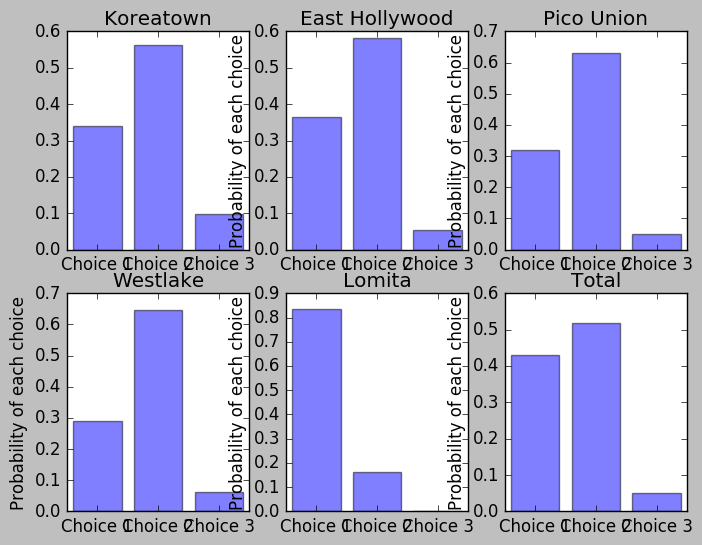

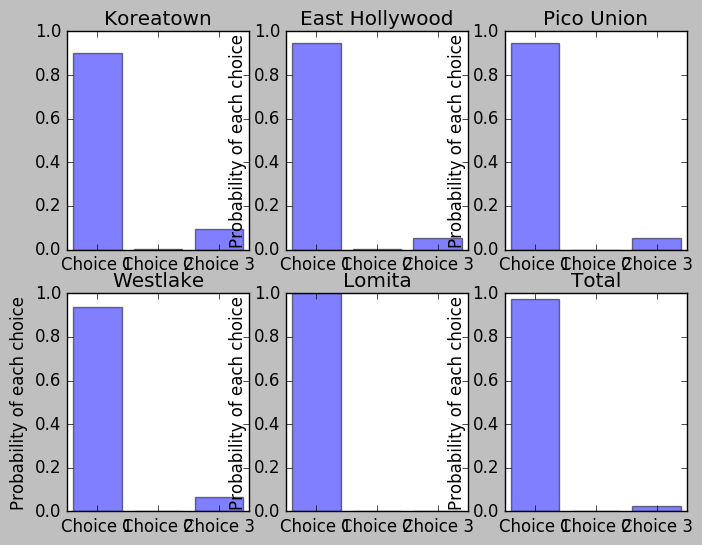

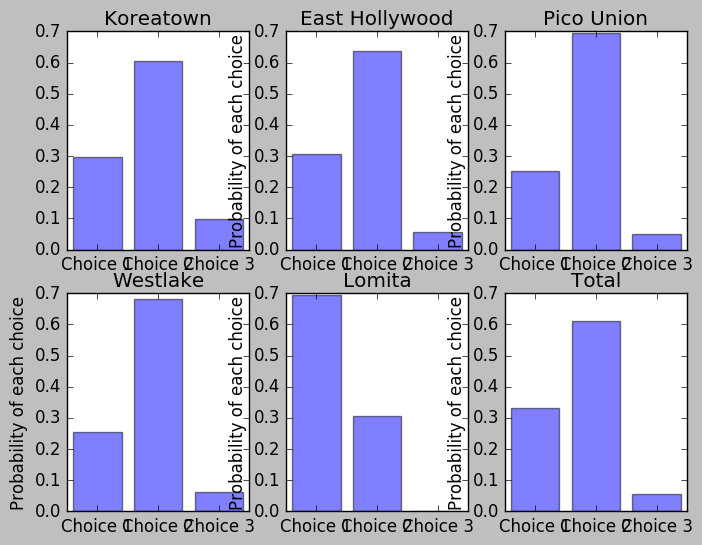

[[  9.00958466e-01   9.45165548e-01   9.46594086e-01   9.34988643e-01
    9.99438428e-01   9.75404017e-01]
 [  2.22253091e-03   1.75998240e-03   4.41371193e-04   9.39923240e-04
    1.33707715e-05   5.34513718e-04]
 [  9.68190026e-02   5.30744693e-02   5.29645432e-02   6.40714342e-02
    5.48201631e-04   2.40614691e-02]]
[[ 0.29716652  0.30836466  0.2535122   0.25421942  0.69306419  0.33144055]
 [ 0.60560244  0.63649049  0.69607283  0.68208916  0.30619646  0.6117655 ]
 [ 0.09723104  0.05514485  0.05041497  0.06369141  0.00073935  0.05679395]]


In [67]:
plotDecisionMaking(count);
plotDecisionMaking(countOwner);
plotDecisionMaking(countRenter);

print(countOwner)
print(countRenter)

In [68]:
buildingAllKoreatown = [buildingAll[i] for i in range(1033)]
recoveryKoreatown = [ sum(x) for x in zip(*buildingAllKoreatown)]
recoveryKoreatown = np.divide(recoveryKoreatown, 1033)

buildingAllEastHollywood = [buildingAll[i+1033] for i in range(2081)]
recoveryEastHollywood = [ sum(x) for x in zip(*buildingAllEastHollywood)]
recoveryEastHollywood = np.divide(recoveryEastHollywood, 2081)

buildingAllPicoUnion = [buildingAll[i+1033+2081] for i in range(715)]
recoveryPicoUnion = [ sum(x) for x in zip(*buildingAllPicoUnion)]
recoveryPicoUnion = np.divide(recoveryPicoUnion, 715)

buildingAllWestlake = [buildingAll[i+1033+2081+715] for i in range(2471)]
recoveryWestlake = [ sum(x) for x in zip(*buildingAllWestlake)]
recoveryWestlake = np.divide(recoveryWestlake, 2471)

buildingAllLomita = [buildingAll[i+1033+2081+715+2471] for i in range(1600)]
recoveryLomita = [ sum(x) for x in zip(*buildingAllLomita)]
recoveryLomita = np.divide(recoveryLomita, 1600)

In [69]:
buildingAllKoreatown2 = [buildingAll2[i] for i in range(1033)]
recoveryKoreatown2 = [ sum(x) for x in zip(*buildingAllKoreatown2)]
recoveryKoreatown2 = np.divide(recoveryKoreatown2, 1033)

buildingAllEastHollywood2 = [buildingAll2[i+1033] for i in range(2081)]
recoveryEastHollywood2 = [ sum(x) for x in zip(*buildingAllEastHollywood2)]
recoveryEastHollywood2 = np.divide(recoveryEastHollywood2, 2081)

buildingAllPicoUnion2 = [buildingAll2[i+1033+2081] for i in range(715)]
recoveryPicoUnion2 = [ sum(x) for x in zip(*buildingAllPicoUnion2)]
recoveryPicoUnion2 = np.divide(recoveryPicoUnion2, 715)

buildingAllWestlake2 = [buildingAll2[i+1033+2081+715] for i in range(2471)]
recoveryWestlake2 = [ sum(x) for x in zip(*buildingAllWestlake2)]
recoveryWestlake2 = np.divide(recoveryWestlake2, 2471)

buildingAllLomita2 = [buildingAll2[i+1033+2081+715+2471] for i in range(1600)]
recoveryLomita2 = [ sum(x) for x in zip(*buildingAllLomita2)]
recoveryLomita2 = np.divide(recoveryLomita2, 1600)

In [74]:
print(recoveryKoreatown2)
# Save community recovery function
# f3 = open("result.csv", "w")
# f3.write(recoveryKoreatown, '\n')
# f3.close()

outF = open("myOutFile.txt", "w")
for line in range(len(totalCommunityRecoveryFunction2)):
    # write line to output file
    outF.write(str(totalCommunityRecoveryFunction2[line]))
    outF.write("\n")
outF.close()

outF = open("myOutFile2.txt", "w")
for line in range(len(recoveryKoreatown2)):
    # write line to output file
    outF.write(str(recoveryKoreatown2[line]))
    outF.write("\n")
outF.close()

outF = open("myOutFile3.txt", "w")
for line in range(len(recoveryLomita2)):
    # write line to output file
    outF.write(str(recoveryLomita2[line]))
    outF.write("\n")
outF.close()

[ 0.81633107  0.8195547   0.83633107  0.85336883  0.86875121  0.88154889
  0.89254598  0.90169409  0.91025169  0.91796709  0.92475315  0.93045499
  0.93630203  0.94141336  0.94609874  0.95068732  0.95469506  0.95827686
  0.96184898  0.96520813  0.96833495  0.97127783  0.97382381  0.97622459
  0.97851888  0.98030978  0.982091    0.98384318  0.98541142  0.98687318
  0.98798645  0.9888577   0.98988383  0.99085189  0.99164569  0.99242014
  0.99306873  0.99377541  0.99437561  0.99494676]


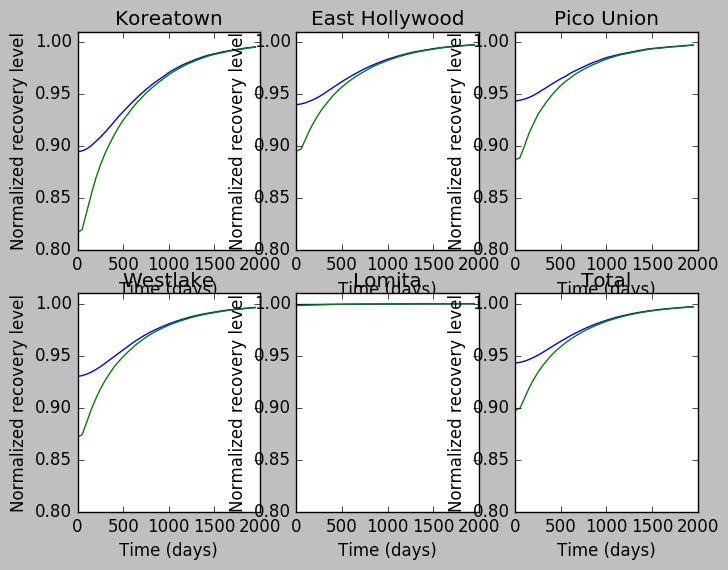

In [71]:
plt.subplot(231)
plt.plot(times, recoveryKoreatown)
plt.plot(times, recoveryKoreatown2)
plt.xlabel('Time (days)')
plt.ylabel('Normalized recovery level')
plt.title('Koreatown')
plt.axis([0, 2000, 0.8, 1.01])


plt.subplot(232)
plt.plot(times, recoveryEastHollywood)
plt.plot(times, recoveryEastHollywood2)
plt.xlabel('Time (days)')
plt.ylabel('Normalized recovery level')
plt.title('East Hollywood')
plt.axis([0, 2000, 0.8, 1.01])


plt.subplot(233)
plt.plot(times, recoveryPicoUnion)
plt.plot(times, recoveryPicoUnion2)
plt.xlabel('Time (days)')
plt.ylabel('Normalized recovery level')
plt.title('Pico Union')
plt.axis([0, 2000, 0.8, 1.01])


plt.subplot(234)
plt.plot(times, recoveryWestlake)
plt.plot(times, recoveryWestlake2)
plt.xlabel('Time (days)')
plt.ylabel('Normalized recovery level')
plt.title('Westlake')
plt.axis([0, 2000, 0.8, 1.01])


plt.subplot(235)
plt.plot(times, recoveryLomita)
plt.plot(times, recoveryLomita2)
plt.xlabel('Time (days)')
plt.ylabel('Normalized recovery level')
plt.title('Lomita')
plt.axis([0, 2000, 0.8, 1.01])


plt.subplot(236)
plt.plot(times, totalCommunityRecoveryFunction)
plt.plot(times, totalCommunityRecoveryFunction2)
plt.xlabel('Time (days)')
plt.ylabel('Normalized recovery level')
plt.title('Total')
plt.axis([0, 2000, 0.8, 1.01])


plt.show()

In [72]:
import csv
from array import array

fl = open('community.csv','w')

writer = csv.writer(fl)
for values in AA:
    writer.writerow(values)
    
fl.close()

fl = open('singleBuilding.csv','w')

writer = csv.writer(fl)
for values in buildingAll:
    writer.writerow(values)
    
fl.close()

In [73]:
# Save community recovery function
f3 = open("NeighborhoodLevelRecoveryFunction.txt", "w")
f3.write(str(New_communityRecoveryFunction))
f3.close()
end = time.clock()
print (end-start)

1240.8131810000002
